In [1]:
## Importing the libraries
## Importing the data frame 

import numpy as np
import seaborn as sns
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings;warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

df = pd.read_csv('Telco_Cust_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape

(7043, 21)

In [3]:
df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
for col in df.columns.to_list():
    print(df[col].value_counts())
    print()

7654-YWJUF    1
0880-FVFWF    1
6288-LBEAR    1
6656-JWRQX    1
7593-JNWRU    1
             ..
0334-GDDSO    1
7706-DZNKK    1
5970-GHJAW    1
0082-OQIQY    1
7156-MHUGY    1
Name: customerID, Length: 7043, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                   

In [6]:
# No phone service
df[df.PhoneService=='No'].MultipleLines.value_counts()

No phone service    682
Name: MultipleLines, dtype: int64

In [7]:
# No internet service
for col in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    print(df[df.InternetService=='No'][col].value_counts())
    print

No internet service    1526
Name: OnlineSecurity, dtype: int64
No internet service    1526
Name: OnlineBackup, dtype: int64
No internet service    1526
Name: DeviceProtection, dtype: int64
No internet service    1526
Name: TechSupport, dtype: int64
No internet service    1526
Name: StreamingTV, dtype: int64
No internet service    1526
Name: StreamingMovies, dtype: int64


**EDA**

In [8]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [10]:
num_feature = ['tenure','MonthlyCharges'] #TotalCharges is processed separately since the data is not stored in float type
cat_feature = ['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
    'tenure_bin']

In [11]:
df[num_feature].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [12]:
df['tenure_bin'] = pd.cut(df.tenure,pd.IntervalIndex.from_tuples([(-1,6),(6,12),(12,18),(18,24),(24,30),(30,36),
                                                                 (36,42),(42,48),(48,54),(54,60),(60,66),(66,72)]))

<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

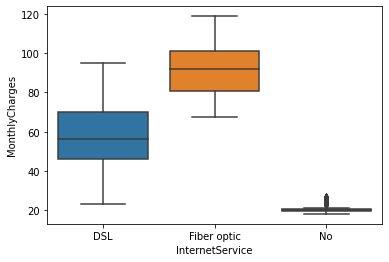

In [13]:
# Compare the MonthlyCharges between InternetService
sns.boxplot(x='InternetService',y='MonthlyCharges',data=df)

**Data cleaning**

In [14]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()][['TotalCharges','Churn']]

,TotalCharges,Churn
488,,No
753,,No
936,,No
1082,,No
1340,,No
3331,,No
3826,,No
4380,,No
5218,,No
6670,,No


In [15]:
# Cast TotalCharges as float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
# Remove rows with missing TotalCharges
df = df[df.TotalCharges.notna()]

In [17]:
df.count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
tenure_bin          7032
dtype: int64

In [18]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

**Feature Engineering**

In [19]:
df['Single'] = (df.Dependents + df.Partner == 0)*1

In [20]:
def feat_engg(df):
    df['Churn'] = (df.Churn=='Yes')*1
    df['Female'] = (df.gender == 'Female')*1
    df['Partner'] = (df.Partner=='Yes')*1
    df['Dependents'] = (df.Dependents=='Yes')*1
    df['PhoneService'] = (df.PhoneService=='Yes')*1
    df['MultipleLines'] = (df.MultipleLines=='Yes')*1
    df = pd.concat([df, pd.get_dummies(df.InternetService, prefix='InternetService').drop('InternetService_No',axis=1)], axis=1)
    df['OnlineSecurity'] = (df.OnlineSecurity=='Yes')*1
    df['OnlineBackup'] = (df.OnlineBackup=='Yes')*1
    df['DeviceProtection'] = (df.DeviceProtection=='Yes')*1
    df['TechSupport'] = (df.TechSupport=='Yes')*1
    df['StreamingTV'] = (df.StreamingTV=='Yes')*1
    df['StreamingMovies'] = (df.StreamingMovies=='Yes')*1
    df = pd.concat([df, pd.get_dummies(df.Contract, prefix='Contract', drop_first=True)], axis=1)
    df['PaperlessBilling'] = (df.PaperlessBilling=='Yes')*1
    df = pd.concat([df, pd.get_dummies(df.PaymentMethod, prefix='PaymentMethod', drop_first=True)], axis=1)
    df = pd.concat([df, pd.get_dummies(df.tenure_bin, prefix='tenure_bin')], axis=1)
    df['Sum_of_internet_services'] = df.OnlineSecurity + df.OnlineBackup + df.DeviceProtection + df.StreamingTV + df.StreamingMovies + df.TechSupport
    df['Single'] = (df.Dependents + df.Partner == 0)*1
    # Drop unnecessary columns
    df = df.drop(['customerID','gender','InternetService','Contract','PaymentMethod','tenure_bin'],axis=1)
    return df

In [21]:
engg_df = feat_engg(df)

In [22]:
engg_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,"tenure_bin_(18, 24]","tenure_bin_(24, 30]","tenure_bin_(30, 36]","tenure_bin_(36, 42]","tenure_bin_(42, 48]","tenure_bin_(48, 54]","tenure_bin_(54, 60]","tenure_bin_(60, 66]","tenure_bin_(66, 72]",Sum_of_internet_services
0,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,34,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,2
2,0,0,0,2,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,45,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,3
4,0,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
engg_df.shape

(7032, 38)

**Pandas Profilling Report**

In [24]:
engg_df.profile_report()

**Training and Test Split**

In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(engg_df, test_size=0.30, random_state=42)

In [26]:
train.Churn.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

In [27]:
test.Churn.value_counts()

0    1549
1     561
Name: Churn, dtype: int64

In [28]:
# Sanity check to ensure base rate between train and test are similar
print(len(train[train.Churn==1])/len(train))
print(len(test[test.Churn==1])/len(test))

0.2657456318569687
0.26587677725118486


**Correlations**

In [29]:
# Feature correlation with target
train.corr()['Churn'].sort_values(ascending=False)

Churn                                    1.000000
InternetService_Fiber optic              0.319334
tenure_bin_(-1, 6]                       0.314846
PaymentMethod_Electronic check           0.291697
MonthlyCharges                           0.201495
PaperlessBilling                         0.178155
Single                                   0.159134
SeniorCitizen                            0.155861
tenure_bin_(6, 12]                       0.072685
StreamingTV                              0.065352
StreamingMovies                          0.063472
MultipleLines                            0.041077
tenure_bin_(12, 18]                      0.035695
PhoneService                             0.018344
Female                                   0.013879
tenure_bin_(24, 30]                     -0.016771
tenure_bin_(18, 24]                     -0.018756
tenure_bin_(30, 36]                     -0.030368
tenure_bin_(36, 42]                     -0.032117
tenure_bin_(48, 54]                     -0.045944


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

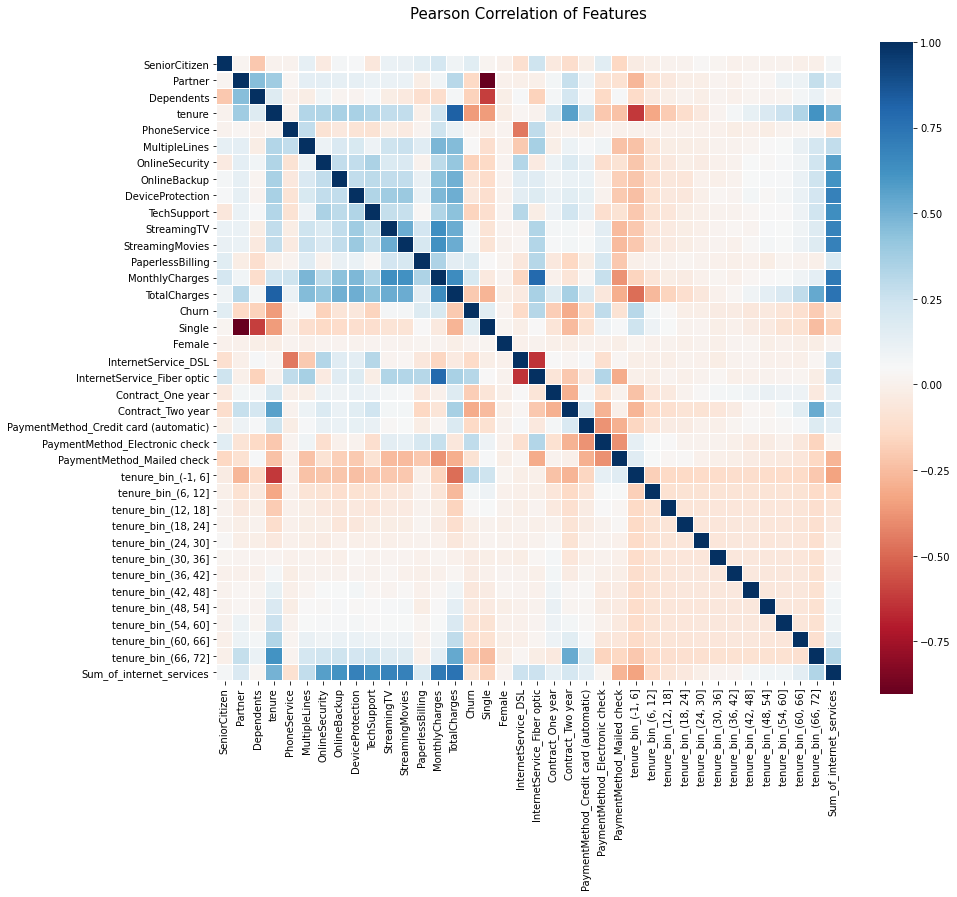

In [30]:
# Draw correlation heatmap
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)

In [31]:
# Remove highly correlated features
removed_feat = ['Partner', 'tenure']

In [32]:
for df in [train,test]:
    df = df.drop(removed_feat,axis=1)

**Model Selection**

In [33]:
X = train.drop('Churn',axis=1)
y = train.Churn

In [34]:
roc_auc={}
pr_auc={}

In [35]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
scores = cross_validate(rfc,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['RandomForest'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['RandomForest'] = np.mean(np.array(scores['test_average_precision']))

In [36]:
# SVC
from sklearn.svm import SVC

svc = SVC(random_state=42)
scores = cross_validate(svc,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['SVC'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['SVC'] = np.mean(np.array(scores['test_average_precision']))

In [37]:
# Xgbclassifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
scores = cross_validate(xgb,X.values,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision')) #somehow model will turn Nan score due to naming convention in tenure_bin. hence, remove the column names
roc_auc['XGBClassifier'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['XGBClassifier'] = np.mean(np.array(scores['test_average_precision']))

In [38]:
#lgbm 
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
scores = cross_validate(lgbm,X.values,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['LGBMClassifier'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['LGBMClassifier'] = np.mean(np.array(scores['test_average_precision']))

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
scores = cross_validate(lr,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['LogisticRegression'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['LogisticRegression'] = np.mean(np.array(scores['test_average_precision']))

In [40]:
# Stochastic Gradient Decent (SGD)
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
scores = cross_validate(clf,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['StochasticGradientDecent'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['StochasticGradientDecent'] = np.mean(np.array(scores['test_average_precision']))

In [41]:
# KNeighborClassifier

from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
scores = cross_validate(knc,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['KNeighborsClassifier'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['KNeighborsClassifier'] = np.mean(np.array(scores['test_average_precision']))

In [42]:
# Neural Network

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
scores = cross_validate(clf,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['NeuralNetworks'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['NeuralNetworks'] = np.mean(np.array(scores['test_average_precision']))

In [43]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
scores = cross_validate(gnb,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['NavieBayes'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['NaiveBayes'] = np.mean(np.array(scores['test_average_precision']))

In [44]:
#Decision Tree

from sklearn import tree

dt = tree.DecisionTreeClassifier()
scores = cross_validate(dt,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['DecisionTree'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['DecisionTree'] = np.mean(np.array(scores['test_average_precision']))

In [45]:
pd.DataFrame.from_dict(roc_auc,orient='index', columns=['ROC-AUC']).sort_values(by='ROC-AUC', ascending=False)

,ROC-AUC
LogisticRegression,0.849792
LGBMClassifier,0.837676
XGBClassifier,0.826764
NavieBayes,0.817845
RandomForest,0.799783
KNeighborsClassifier,0.752379
StochasticGradientDecent,0.712680
SVC,0.708517
DecisionTree,0.645249
NeuralNetworks,0.500000


In [46]:
pd.DataFrame.from_dict(pr_auc,orient='index', columns=['PR-AUC']).sort_values(by='PR-AUC', ascending=False)

,PR-AUC
LogisticRegression,0.661661
LGBMClassifier,0.646120
XGBClassifier,0.622920
NaiveBayes,0.617863
RandomForest,0.580326
StochasticGradientDecent,0.534007
SVC,0.523656
KNeighborsClassifier,0.501444
DecisionTree,0.368058
NeuralNetworks,0.265745


In [47]:
#logistic summary output 

import statsmodels.api as sm  
x_train1 = sm.add_constant(X)
lm_1 = sm.OLS(y, x_train1).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     63.52
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:00:31   Log-Likelihood:                -2039.6
No. Observations:                4922   AIC:                             4151.
Df Residuals:                    4886   BIC:                             4385.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.4124      0.112      3.698      0.000       0.194       0.631
SeniorCitizen                             0.0532      0.015      3.472      0.001       0.023       0.083
Partner                                   0.0559      0.026      2.141      0.032       0.005       0.107
Dependents                               -0.0166      0.016     -1.049      0.294      -0.048       0.014
tenure                                   -0.0089      0.003     -2.815      0.005      -0.015      -0.003
PhoneService                              0.0485      0.105      0.461      0.645      -0.158       0.255
MultipleLines                             0.0732      0.029      2.544      0.011       0.017       0.130
OnlineSecurity                           -0.0500      0.013     -3.825      0.000      -0.076      -0.024
OnlineBackup                             -0.0135      0.012     -1.081      0.280      -0.038       0.011
DeviceProtection                         -0.0025      0.013     -0.191      0.848      -0.029       0.024
TechSupport                              -0.0503      0.014     -3.677      0.000      -0.077      -0.023
StreamingTV                               0.0708      0.026      2.774      0.006       0.021       0.121
StreamingMovies                           0.0726      0.026      2.830      0.005       0.022       0.123
PaperlessBilling                          0.0284      0.012      2.431      0.015       0.005       0.051
MonthlyCharges                           -0.0030      0.005     -0.591      0.555      -0.013       0.007
TotalCharges                          -6.722e-05   7.76e-06     -8.660      0.000   -8.24e-05    -5.2e-05
Single                                    0.0408      0.029      1.404      0.160      -0.016       0.098
Female                                    0.0018      0.011      0.170      0.865      -0.019       0.022
InternetService_DSL                       0.2182      0.131      1.671      0.095      -0.038       0.474
InternetService_Fiber optic               0.4981      0.258      1.930      0.054      -0.008       1.004
Contract_One year                        -0.1111      0.017     -6.660      0.000      -0.144      -0.078
Contract_Two year                        -0.1149      0.021     -5.597      0.000      -0.155      -0.075
PaymentMethod_Credit card (automatic)    -0.0125      0.016     -0.783      0.434      -0.044       0.019
PaymentMethod_Electronic check            0.0453      0.016      2.893      0.004       0.015       0.076
PaymentMethod_Mailed check               -0.0133      0.017     -0.770      0.441      -0.047       0.021
tenure_bin_(-1, 6]                       -0.1321      0.097     -1.364      0.173      -0.322       0.058
tenure_bi